## Develping a model for  Predicting `F1 Score` for walking



**We are building a model for cow walking activties which can predict F1 score**


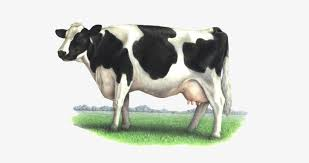

In [47]:
cow

In [44]:
cow=Image("images.png",width=500,
    height=100)

In [1]:
#Imoprting tools we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image


%matplotlib inline

In [3]:
#Importing dataset
df = pd.read_csv("W3_train.csv")
df.head()

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
0,1628079642,-0.220215,0.952637,0.196289,16.845703,-21.911621,1.098633,52.5,1305.0,312.0,3
1,1628079642,-0.241211,0.943848,0.182617,10.803223,-11.962891,5.920410,60.0,1311.0,333.0,3
2,1628079642,-0.230469,0.939453,0.226074,6.286621,-9.094238,8.117676,51.0,1302.0,346.5,3
3,1628079642,-0.229004,0.910156,0.264649,-0.061035,-9.948730,9.765625,45.0,1312.5,319.5,3
4,1628079642,-0.207519,0.914551,0.146973,-4.089355,-14.160156,11.718750,24.0,1314.0,331.5,3


In [17]:
len(df)

145369

In [5]:
df.dtypes

time       int64
acc_x    float64
acc_y    float64
acc_z    float64
gyr_x    float64
gyr_y    float64
gyr_z    float64
mag_x    float64
mag_y    float64
mag_z    float64
label      int64
dtype: object

In [18]:
df["label"].value_counts()

3    145369
Name: label, dtype: int64

In [7]:
df.describe()

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
count,1.453690e+05,145369.000000,145369.000000,145369.000000,145369.000000,145369.000000,145369.000000,145369.000000,145369.000000,145369.000000,145369.0
mean,1.628189e+09,-0.014142,0.197847,0.162604,0.443991,-1.767942,-0.681841,-270.597187,462.828344,207.434907,3.0
std,7.942687e+04,0.283671,0.953655,0.239520,25.824908,41.348858,25.011255,318.726917,573.379663,396.147372,0.0
min,1.628079e+09,-14.734375,-4.904297,-13.041992,-931.457519,-1764.404297,-1834.228516,-1173.000000,-1057.500000,-958.500000,3.0
25%,1.628124e+09,-0.165527,-0.909180,0.051270,-10.437012,-21.240234,-12.512207,-489.000000,-3.000000,67.500000,3.0
50%,1.628172e+09,-0.013184,0.795410,0.171875,0.427246,-2.136230,-0.366211,-262.500000,642.000000,291.000000,3.0
75%,1.628252e+09,0.140625,0.967285,0.289062,11.596680,17.333984,11.352539,-75.000000,850.500000,495.000000,3.0
max,1.628338e+09,10.515137,11.826172,7.150879,1498.535156,1999.755859,793.579101,627.000000,1690.500000,1150.500000,3.0


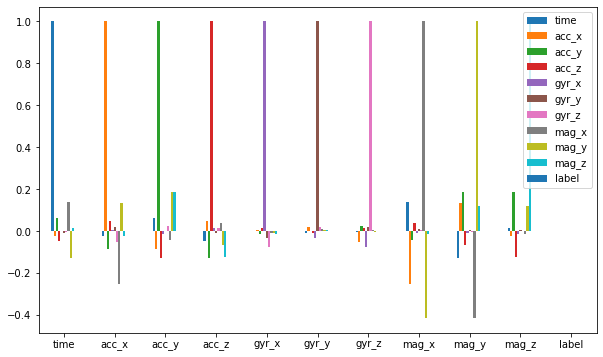

In [11]:
df.corr().plot(kind="bar",
              figsize=(10,6))
plt.xticks(rotation=0);

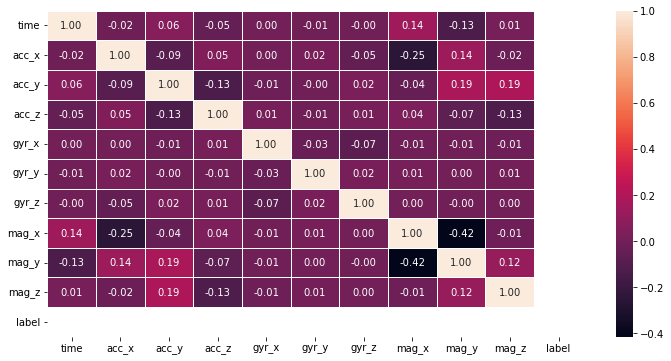

In [12]:
cor_mat = df.corr()
fig,ax = plt.subplots(figsize=(12,6))
ax = sns.heatmap(cor_mat,
                annot=True,
                linewidths=0.5,
                fmt=".2f")

In [13]:
#Importing train_test_split from sklearn model selaction
from sklearn.model_selection import train_test_split


#Creating X & y labels
X = df.drop("label",axis=1)
y = df["label"]

#Spliting the data into traning and testing 
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) 

In [14]:
X_train

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z
104921,1628079876,0.520020,0.697266,0.058105,21.911621,-5.981445,29.724121,-334.5,193.5,214.5
76690,1628334631,-0.069336,-1.071777,0.295410,22.644043,-24.047852,28.625488,-9.0,102.0,-568.5
108477,1628164661,0.244629,-0.802734,0.495605,-4.272461,46.386719,-18.249512,-643.5,-555.0,136.5
70081,1628251029,0.281250,-1.244629,0.155273,36.132812,-76.660156,3.601074,-691.5,93.0,-604.5
7203,1628080063,-0.332520,-1.295898,0.207519,-8.117676,8.972168,-22.460938,-408.0,652.5,154.5
...,...,...,...,...,...,...,...,...,...,...
65213,1628209997,0.287109,-1.025879,0.053223,1.831055,-6.958008,-17.395020,-91.5,30.0,-796.5
114746,1628211291,-0.130859,0.866699,0.414551,9.582520,-29.418945,-6.225586,-66.0,-60.0,487.5
119708,1628258227,0.065918,0.813965,-0.032715,-29.785156,31.372070,-15.869141,-817.5,108.0,468.0
56855,1628123593,0.049805,0.773926,0.270020,0.183106,64.147949,-14.953613,-280.5,655.5,-906.0


In [15]:
X_test

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z
22271,1628165451,0.847168,-0.721191,0.123535,6.896973,-37.109375,-34.606934,-489.0,870.0,133.5
47766,1628338088,0.462891,0.918457,0.117676,-7.324219,-28.137207,-21.911621,-288.0,1425.0,612.0
25274,1628166232,-0.040527,-0.744141,-0.471680,2.502441,-23.315430,6.958008,-505.5,664.5,586.5
2321,1628079811,0.101562,0.906250,0.476074,40.954590,-28.625488,8.117676,102.0,1371.0,345.0
58934,1628165737,0.390625,1.149414,0.285645,20.507812,-0.244141,-6.225586,-165.0,700.5,-663.0
...,...,...,...,...,...,...,...,...,...,...
60060,1628165761,-0.030273,0.774414,0.104004,-23.620605,-3.051758,-1.220703,-61.5,801.0,-253.5
133454,1628164974,0.019043,1.017578,-0.097168,0.610352,-29.174805,30.578613,-358.5,1066.5,441.0
63501,1628209803,-0.105957,-1.113770,0.373047,-18.249512,12.268066,-15.686035,-354.0,24.0,-370.5
100888,1628337358,-0.070801,0.859375,0.248047,15.075683,4.760742,7.263184,231.0,-180.0,765.0


In [16]:
len(X_train) , len(X_test)

(116295, 29074)

In [19]:
# Importing RandomforesRegressor from sklearn's ensamble model 
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor()

In [20]:
clf.fit(X_train,y_train)

RandomForestRegressor()

In [21]:
clf.score(X_train,y_train)

1.0

In [22]:
clf.score(X_test,y_test)

1.0

In [25]:
y_pred = clf.predict(X_test)

In [26]:
y_pred

array([3., 3., 3., ..., 3., 3., 3.])

In [27]:
y_pred.mean()

3.0

In [28]:
#Importing classification reports from sklearns metrics
from sklearn.metrics import classification_report

In [29]:
#Creating classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00     29074

    accuracy                           1.00     29074
   macro avg       1.00      1.00      1.00     29074
weighted avg       1.00      1.00      1.00     29074



In [30]:
#Importing F1 score from sklaern metrics
from sklearn.metrics import f1_score


In [35]:
f1_score(y_test,y_pred, average='weighted')


1.0

In [37]:
f1

1.0